# 1. IMPORT LIBRERIES

In [3]:
#import libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORT DATAFRAME

In [4]:
# Import Dataset 
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 3.EXPLORE DATAFRAME

In [5]:
# Identificar el tipo de datos de cada columna
data_types = df.dtypes
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numeric_columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## 3.1 Info

In [3]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 3.2 shape

In [4]:
#shape
df.shape

(41188, 21)

## 3.3 Nul Dataframe

In [5]:
df.isna().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

### FIRST CHECK POINT / WRITE CONCLUSIONS

* Colums: 21
* Row: 41188

##### CATEGORIC

*  1   job             41188 non-null  object 
*  2   marital         41188 non-null  object 
*  3   education       41188 non-null  object 
*  4   default         41188 non-null  object 
*  5   housing         41188 non-null  object 
*  6   loan            41188 non-null  object 
*  7   contact         41188 non-null  object 
*  8   month           41188 non-null  object 
*  9   day_of_week     41188 non-null  object 
*  14  poutcome        41188 non-null  object 
*  20  y               41188 non-null  object 
##### NUMERIC
*  0   age             41188 non-null  int64  
*  10  duration        41188 non-null  int64  
*  11  campaign        41188 non-null  int64  
*  12  pdays           41188 non-null  int64  
*  13  previous        41188 non-null  int64  
*  15  emp.var.rate    41188 non-null  float64
*  16  cons.price.idx  41188 non-null  float64
*  17  cons.conf.idx   41188 non-null  float64
*  18  euribor3m       41188 non-null  float64
*  19  nr.employed     41188 non-null  float64

##### TARGET
* 20  y               41188 non-null  object 
* Why target is y? Because we want know that if the people going to contrate or not a long deposite



# 4. UNIVARIATE DATA ANALYSIS

## 4.1 Univariate Categorical Data Analysis

In [6]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

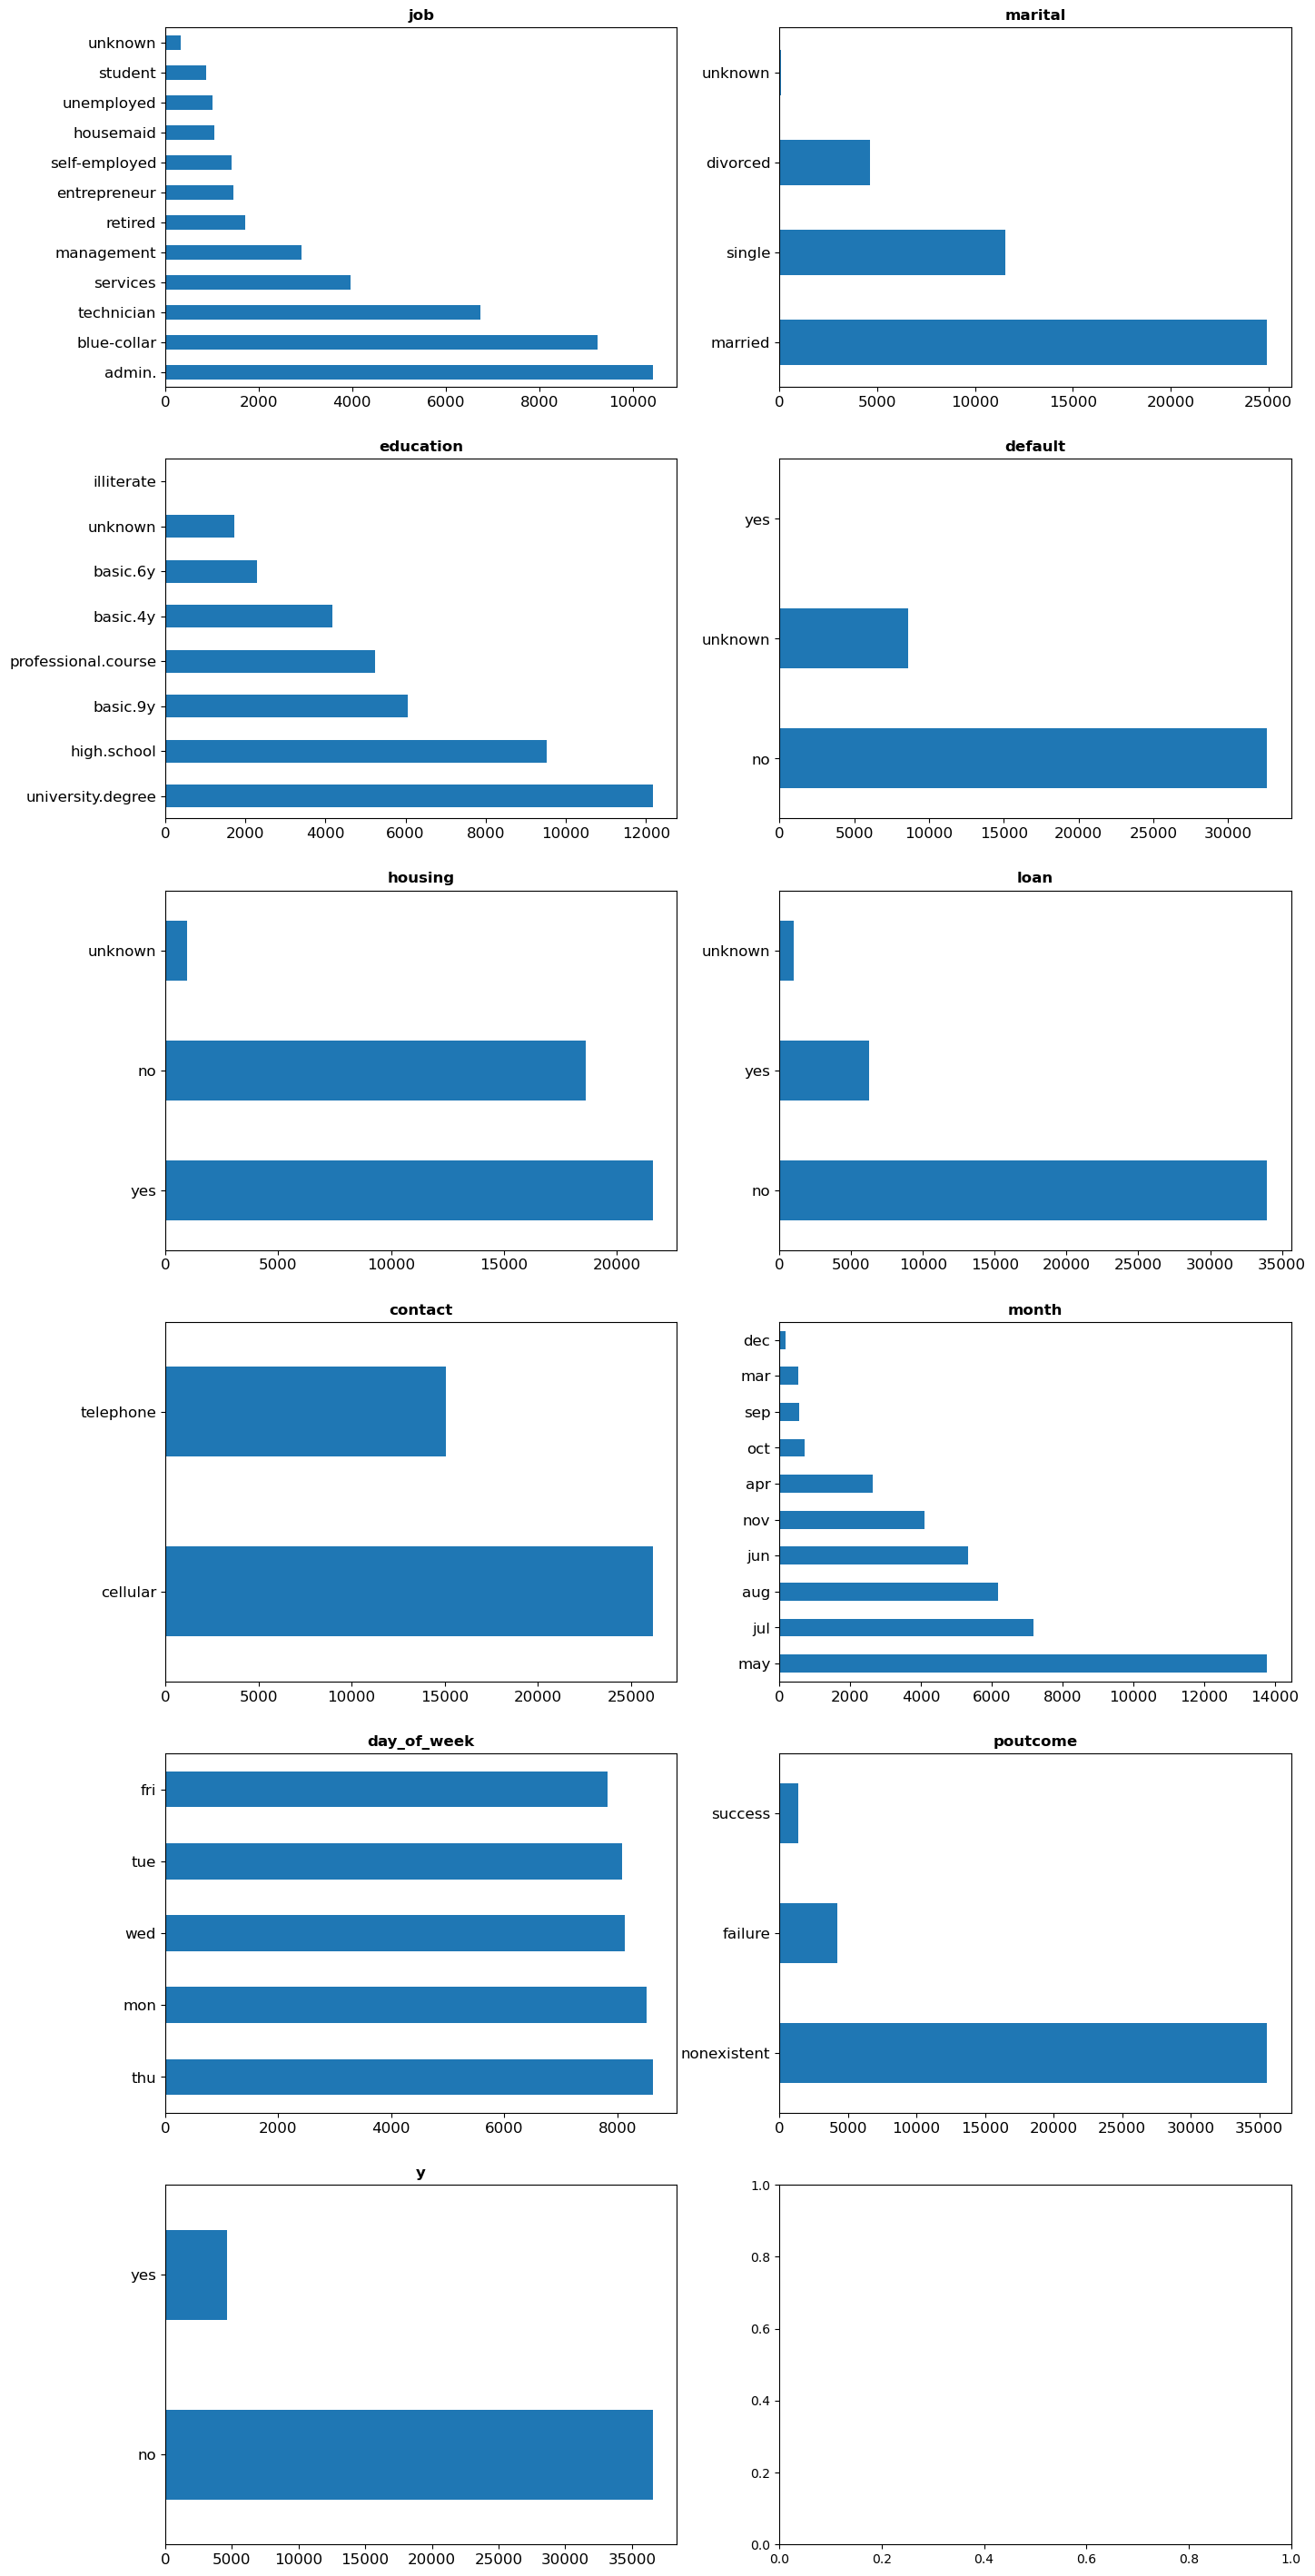

In [7]:
graficos_eda_categoricos(df.select_dtypes('O'))

### SECOND CHECK POINT / WRITE CONCLUSIONS

##### Initial  Potential  human profile
* job: tecnic, blue collar or admin
* Married
* University or high school
* Dont credit and dont loan
* have a hausing
* responds to mobile before that phone home.
* Has not been the subject of a previous campaign
* Spring and summer is a better time for call.
* The majority person reject campaign

## 4.2 Univariate Numeric Data Analysis

In [8]:
# Analysis Numeric with numbers
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [9]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,41188.0,40.024060,38.000,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,180.000,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.000,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,999.000,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.000,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.100,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,93.749,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,-41.800,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,4.857,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,5191.000,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
def graficos_eda_numericos(cat):
    # Filtrar las columnas numéricas
    cat_numericas = cat.select_dtypes(include='number')

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 2  # Histograma y Boxplot

    # Definimos el gráfico con el número adecuado de subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, num_filas * 6))

    # Aplanamos los ejes para iterar a través de ellos como si fueran un arreglo unidimensional
    ax = ax.flat

    # Creamos un bucle que añade histogramas y boxplots para cada variable numérica
    for cada, variable in enumerate(cat_numericas):
        # Histograma
        sns.histplot(cat_numericas[variable], ax=ax[cada*num_columnas], bins=20, kde=True)
        ax[cada*num_columnas].set_title(f'Histograma: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Boxplot
        sns.boxplot(x=cat_numericas[variable], ax=ax[cada*num_columnas+1], orient='h')
        ax[cada*num_columnas+1].set_title(f'Boxplot: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

    # Ajustamos el espacio entre los subplots para una mejor visualización
    plt.tight_layout()

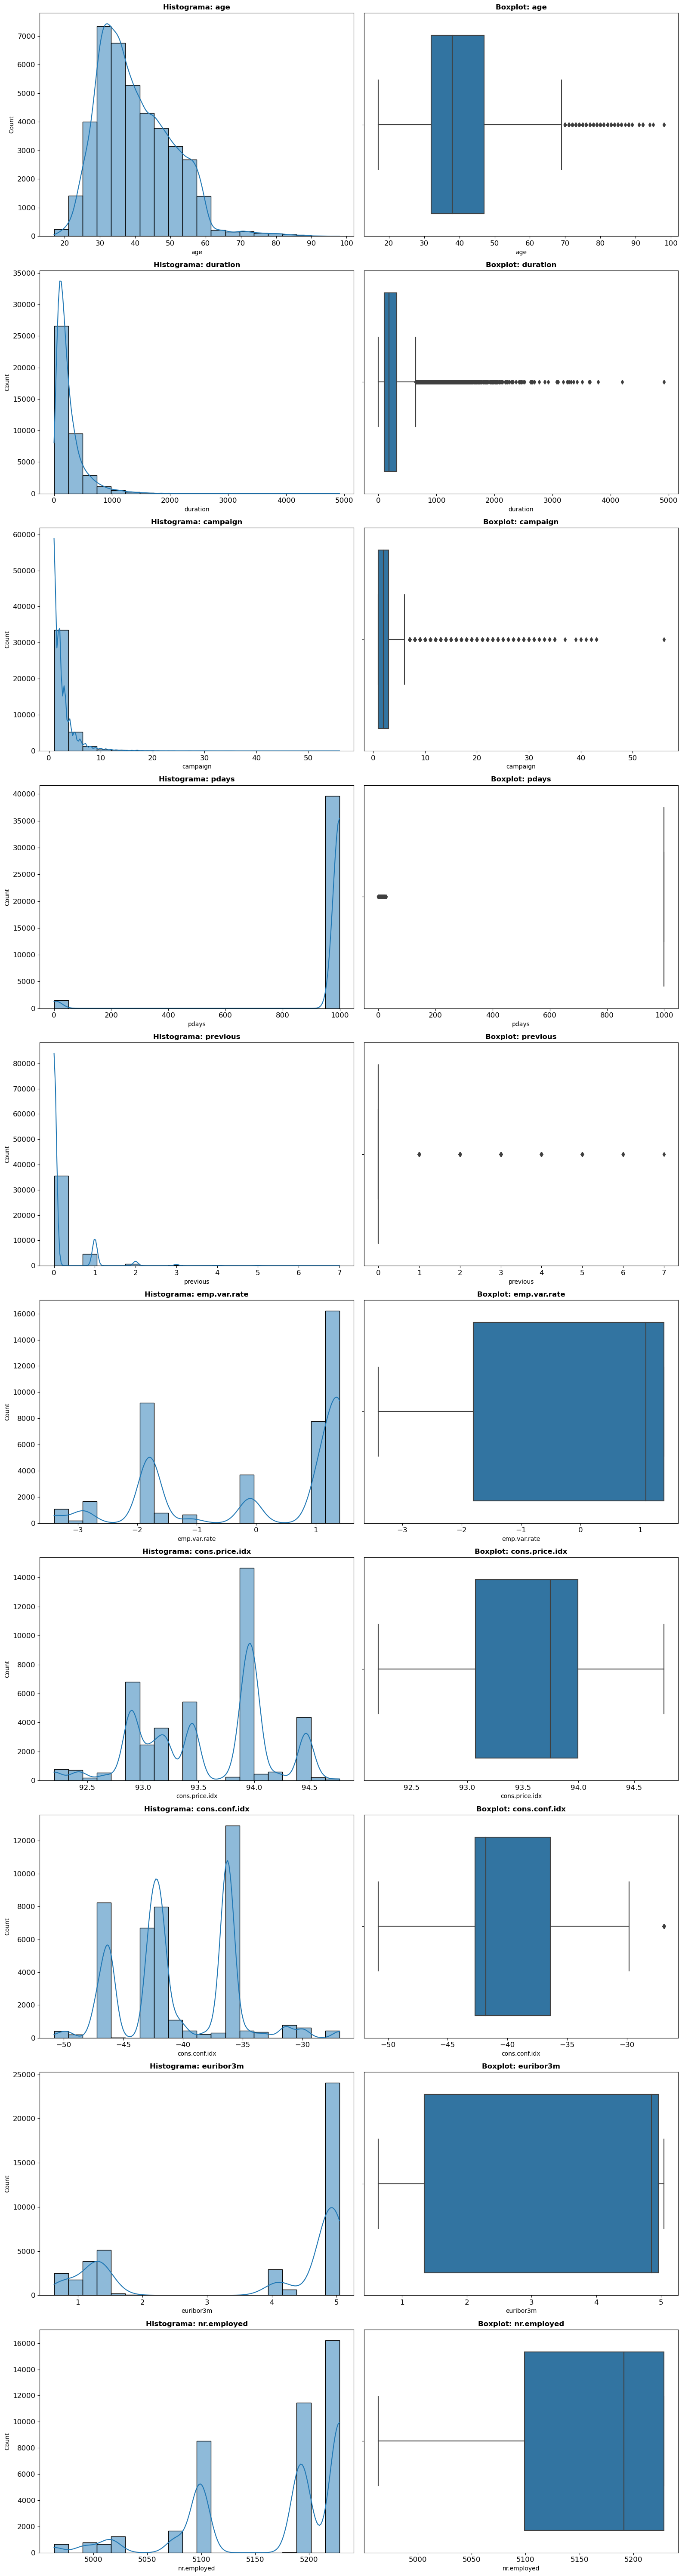

In [11]:
graficos_eda_numericos(df)

### THIRD CHECK POINT / WRITE CONCLUSIONS

##### Complete  Potential  human profile
*  age: 30-45 Ages
*  duration: 0-250 second
*  campaign: 
*  pdays: 1000 days
*  previous: 0
*  emp.var.rate: 1
*  cons.price.idx: 94
*  cons.conf.idx: -43 to -33
*  euribor3m: 5
*  nr.employed: 5100-5200

# 5. MULTIVARIATE VARIABLES ANALYSIS

# 5.1 Numerical-numerical analysis

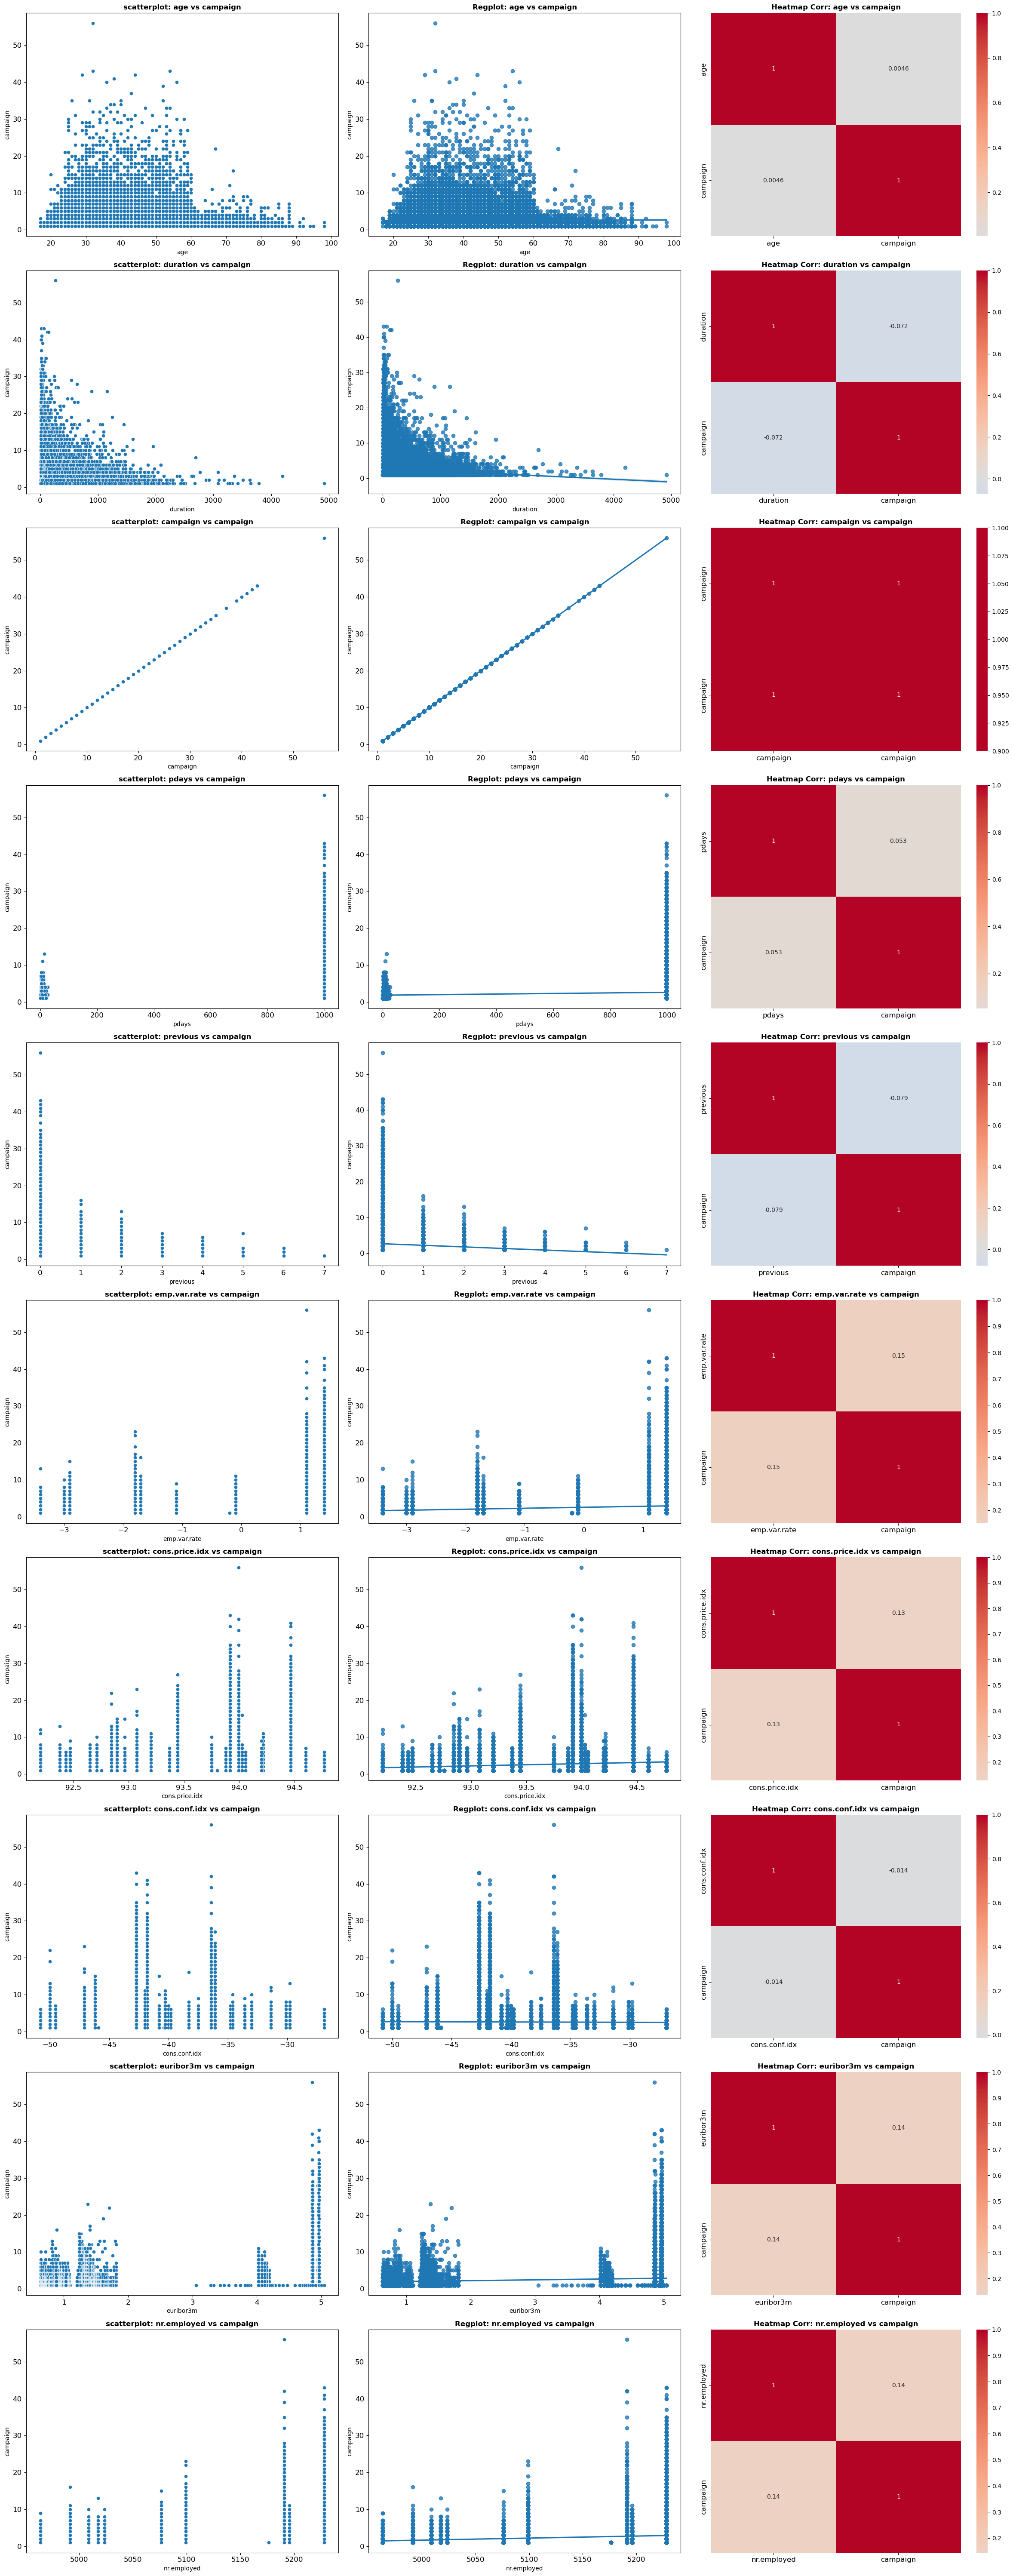

In [12]:
def comparar_numericas_con_target(cat, target):
    # Filtrar las columnas numéricas
    cat_numericas = cat.select_dtypes(include='number')

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 3

    # Definimos el gráfico con el número adecuado de subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(24, num_filas * 6))

    # Aplanamos los ejes para iterar a través de ellos como si fueran un arreglo unidimensional
    ax = ax.flat

    # Creamos un bucle que añade gráficos de dispersión, regplot y heatmap para cada variable numérica con el target
    for cada, variable in enumerate(cat_numericas):
        # Gráfico de dispersión
        sns.scatterplot(x=cat_numericas[variable], y=target, data=cat, ax=ax[cada*num_columnas])
        ax[cada*num_columnas].set_title(f'scatterplot: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Gráfico regplot
        sns.regplot(x=cat_numericas[variable], y=target, data=cat, ax=ax[cada*num_columnas+1])
        ax[cada*num_columnas+1].set_title(f'Regplot: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

        # Heatmap de correlación
        corr_matrix = cat[[variable, target]].corr()
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, ax=ax[cada*num_columnas+2])
        ax[cada*num_columnas+2].set_title(f'Heatmap Corr: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+2].tick_params(labelsize=12)

    # Ajustamos el espacio entre los subplots para una mejor visualización
    plt.tight_layout()

# Llamada a la función con tu DataFrame que contiene variables numéricas y el target
# Reemplaza "campaign" con el nombre de tu columna target en el DataFrame
comparar_numericas_con_target(df, "campaign")

# 5.2 Categorical-Categorical analysis

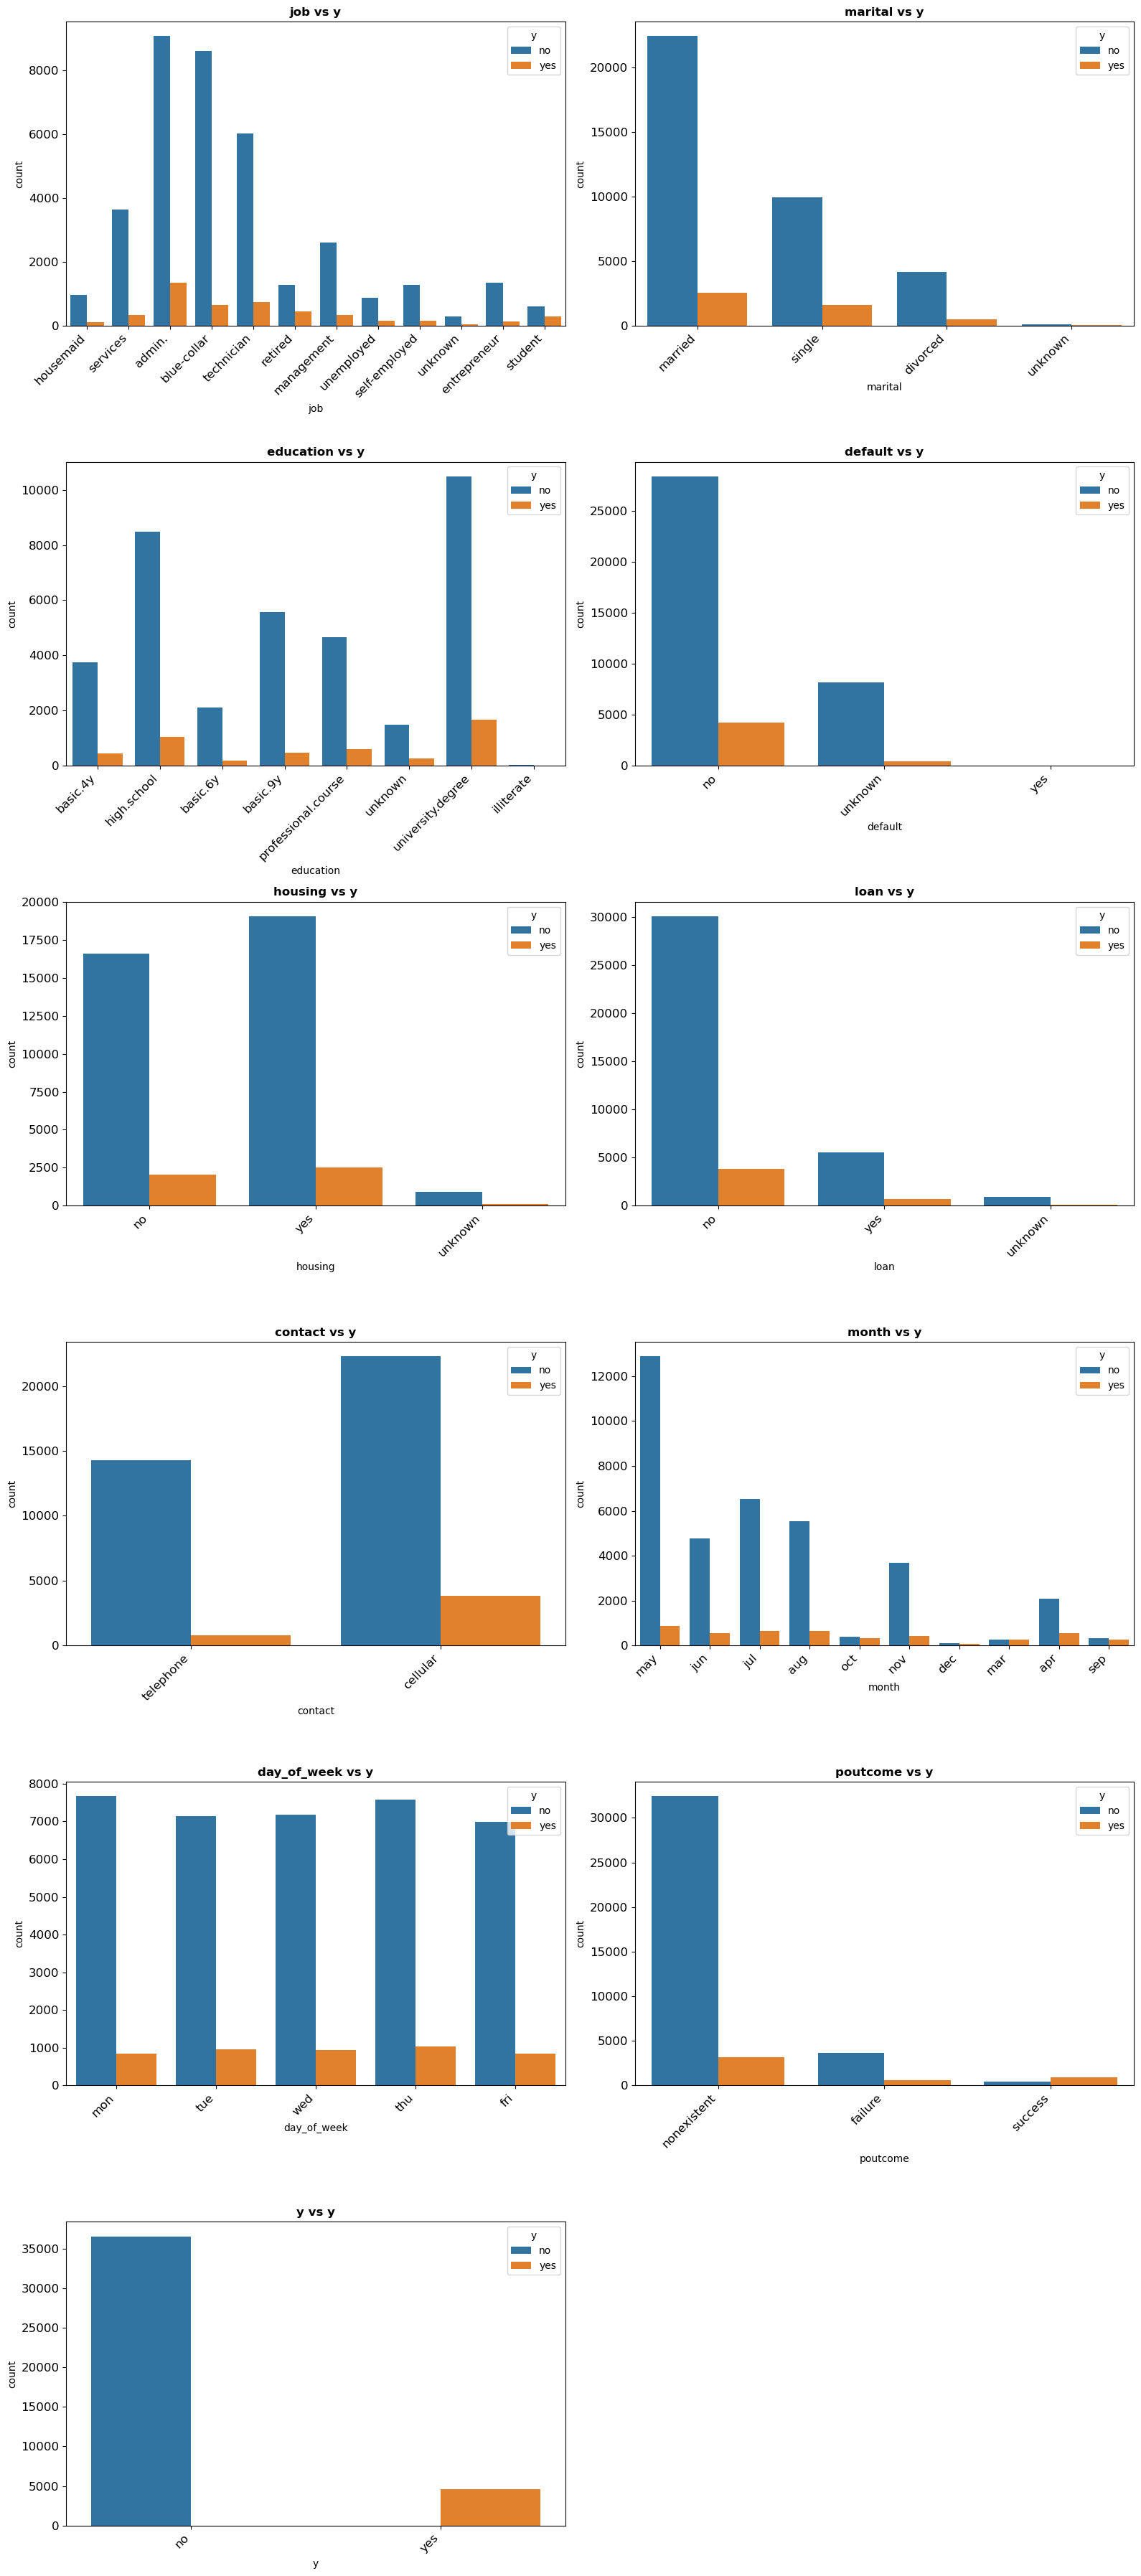

In [13]:
def comparar_categoricas_con_target(cat, target):
    # Filtrar las columnas categóricas
    cat_categoricas = cat.select_dtypes(include='object')

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_filas = len(cat_categoricas.columns) // 2 + len(cat_categoricas.columns) % 2
    num_columnas = 2

    # Definimos el gráfico con el número adecuado de subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, num_filas * 6))

    # Aplanamos los ejes para iterar a través de ellos como si fueran un arreglo unidimensional
    ax = ax.flat

    # Creamos un bucle que añade gráficos de barras para cada variable categórica con el target
    for cada, variable in enumerate(cat_categoricas):
        # Gráfico de barras
        sns.countplot(x=variable, hue=target, data=cat, ax=ax[cada])
        ax[cada].set_title(f'{variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)
        ax[cada].legend(title=target)

        # Rotamos el texto en el eje x para evitar superposiciones
        ax[cada].set_xticklabels(ax[cada].get_xticklabels(), rotation=45, ha='right')

    # Eliminamos ejes no utilizados en caso de que sobren
    for i in range(len(cat_categoricas.columns), num_filas*num_columnas):
        f.delaxes(ax[i])

    # Ajustamos el espacio entre los subplots para una mejor visualización
    plt.tight_layout()

# Llamada a la función con tu DataFrame que contiene variables categóricas y el target
# Reemplaza "campaign" con el nombre de tu columna target en el DataFrame
comparar_categoricas_con_target(df, "y")

### FOURTH CHECK POINT / WRITE CONCLUSIONS

##### Relationship

###### Numerical: 
* The comparations numerical / numerical is irrelevant 
* The best Relationship is 0.15

###### Categoric: 
* higher percentage of people who accept in relation to the number of people who accepted.
* jStudent
* Divorced
* Basic6y and unknow
* Hausing: No and unknow
* Loan: yes
* Cellullar
* The best Month for call: oct,dec,mar,ap,sep
* day of wee: irrelevant


# 6. TOTAL COMPARATION

# 6.1 Factorice Categorical Data

In [14]:
df['jobf'] = pd.factorize(df['job'])[0]
df['maritalf'] = pd.factorize(df['marital'])[0]
df['educationf'] = pd.factorize(df['education'])[0]
df['defaultf'] = pd.factorize(df['default'])[0]
df['housingf'] = pd.factorize(df['housing'])[0]
df['loanf'] = pd.factorize(df['loan'])[0]
df['contactf'] = pd.factorize(df['contact'])[0]
df['monthf'] = pd.factorize(df['month'])[0]
df['day_of_weekf'] = pd.factorize(df['day_of_week'])[0]
df['poutcomef'] = pd.factorize(df['poutcome'])[0]
df['yf'] = pd.factorize(df['y'])[0]


# 6.2 Comparation total Categorical variables

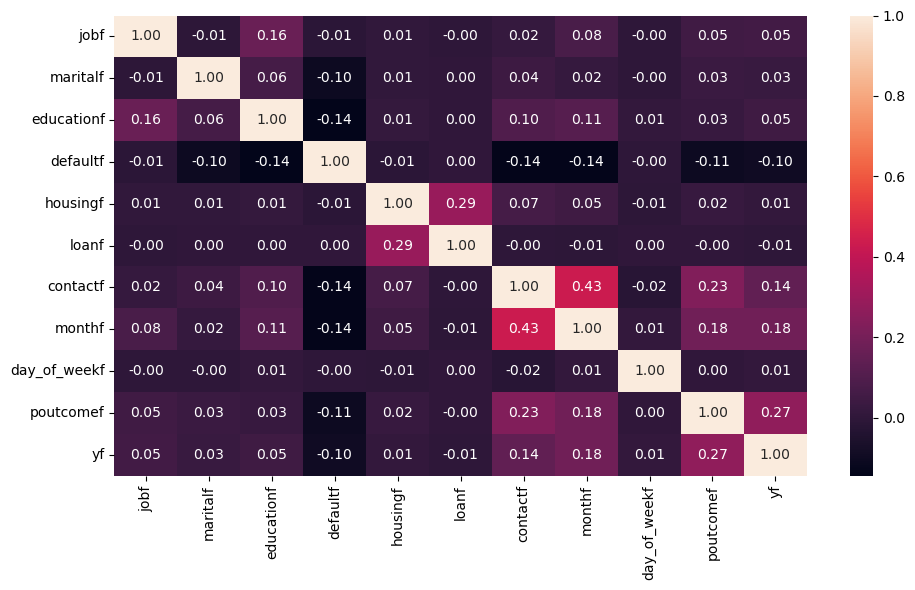

In [15]:
# Draw a Canvas
fig, axis = plt.subplots(figsize = (10, 6))

# Plot a Heatmap only categorical factorize
sns.heatmap(df[['jobf', 'maritalf', 'educationf', 'defaultf','housingf', 'loanf', 'contactf', 'monthf','day_of_weekf','poutcomef','yf']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

### FIFTH CHECK POINT / WRITE CONCLUSIONS

##### Relevant

* Relationship: month with contact 0.43
* Relationship: Loan with housing 0.29

# 6.3 Comparation total numeric variables

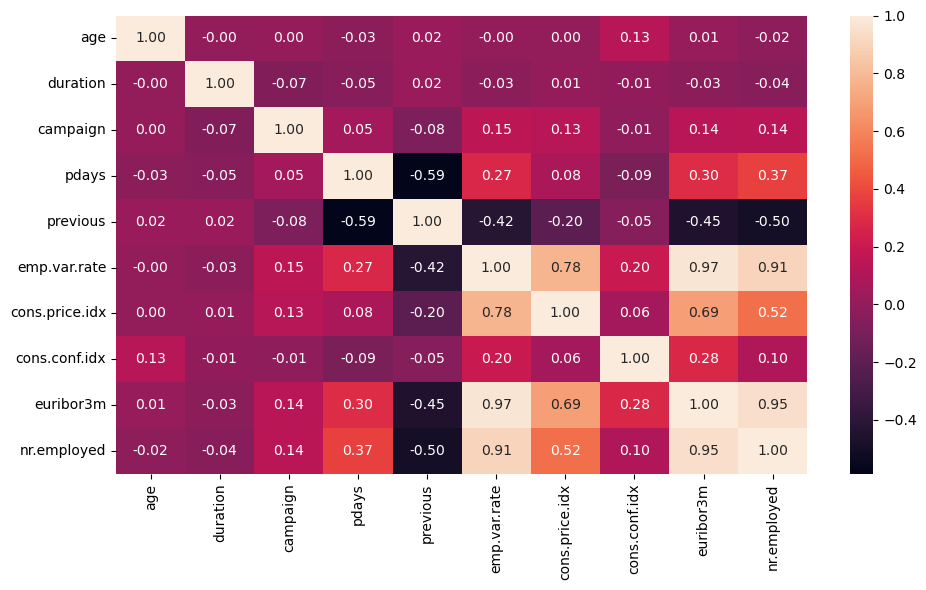

In [16]:
# Draw a Canvas
fig, axis = plt.subplots(figsize = (10, 6))

# Plot a Heatmap only categorical factorize
sns.heatmap(df[['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()



### SIXTH CHECK POINT / WRITE CONCLUSIONS

##### Relevant
* We can see many relationship  with diversas variables numerics.
* Relationship: pdays with nr.employed 0.37
* Relationship: pdays with nr.emp.var.rate 0.27
* Relationship: pdays with euribor3m 0.30
* Relationship: pdays with previous 0.59
* Relationship: previous with employed 0.50
* Relationship: previous with euribor3m 0.45
* Relationship: previous with emp.var.rate 0.42

##### IMPORTANT RELATIONSHIP
* Relationship: emp.var.rate with nr.employed ¡¡0.91¡¡IMPORTANT
* Relationship: emp.var.rate with nr.euribor3m ¡¡0.93¡¡ IMPORTANT
* Relationship: emp.var.rate with nr.cons.price.idx ¡¡0.78¡¡ IMPORTANT
* Relationship: euribor3m  wirth employed ¡¡0.95¡¡ IMPORTANT    (WE CAN SEE THAT EURIBOR IS A VERY IMPORTANT VARIABLE FOR SELEC CONTRACT THIS PRODUCT)



##### CONCLUSION

* The variables emp and euribor is very relationship because these affect generic economy.
* if these variables high more probability acept our product. 


# 6.4 Comparation total variables (NUMERIC AND CATEGORIC)

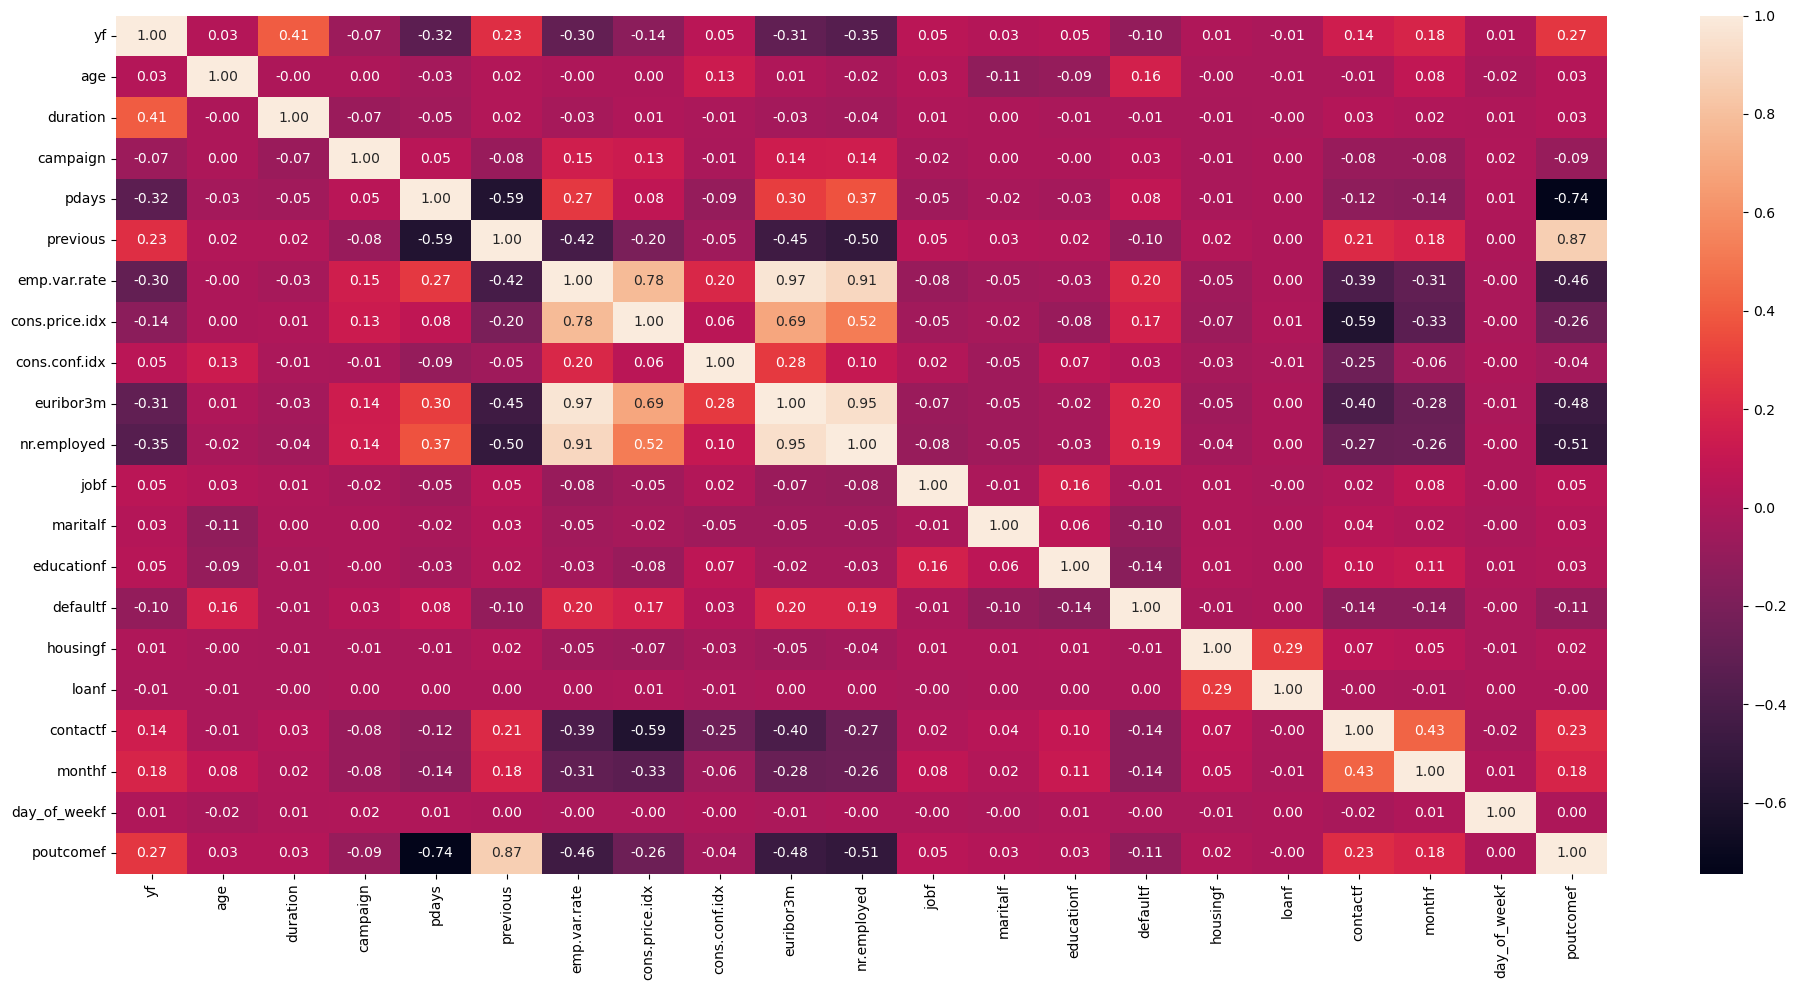

In [17]:
# Draw a Canvas
fig, axis = plt.subplots(figsize = (20, 10))

# Plot a Heatmap only categorical factorize
sns.heatmap(df[['yf','age', 'duration', 'campaign', 'pdays','previous','emp.var.rate',
'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','jobf', 'maritalf', 'educationf',
'defaultf','housingf', 'loanf', 'contactf', 'monthf','day_of_weekf','poutcomef']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

### SEVENTH CHECK POINT / WRITE CONCLUSIONS

##### Relevant

1. Confirmation: 
* The variables emp and euribor is very relationship because these affect generic economy.
* if these variables high more probability acept our product. 

2. Contact:
* Relationship: month with contact: Is very important to have the campaing in the best month (Dont spring and summer)

3. Poutcome:
* Contact with people that we dont call in previous season


# OPTIONAL: SEE COMPARATION WITH LINE REGRETION

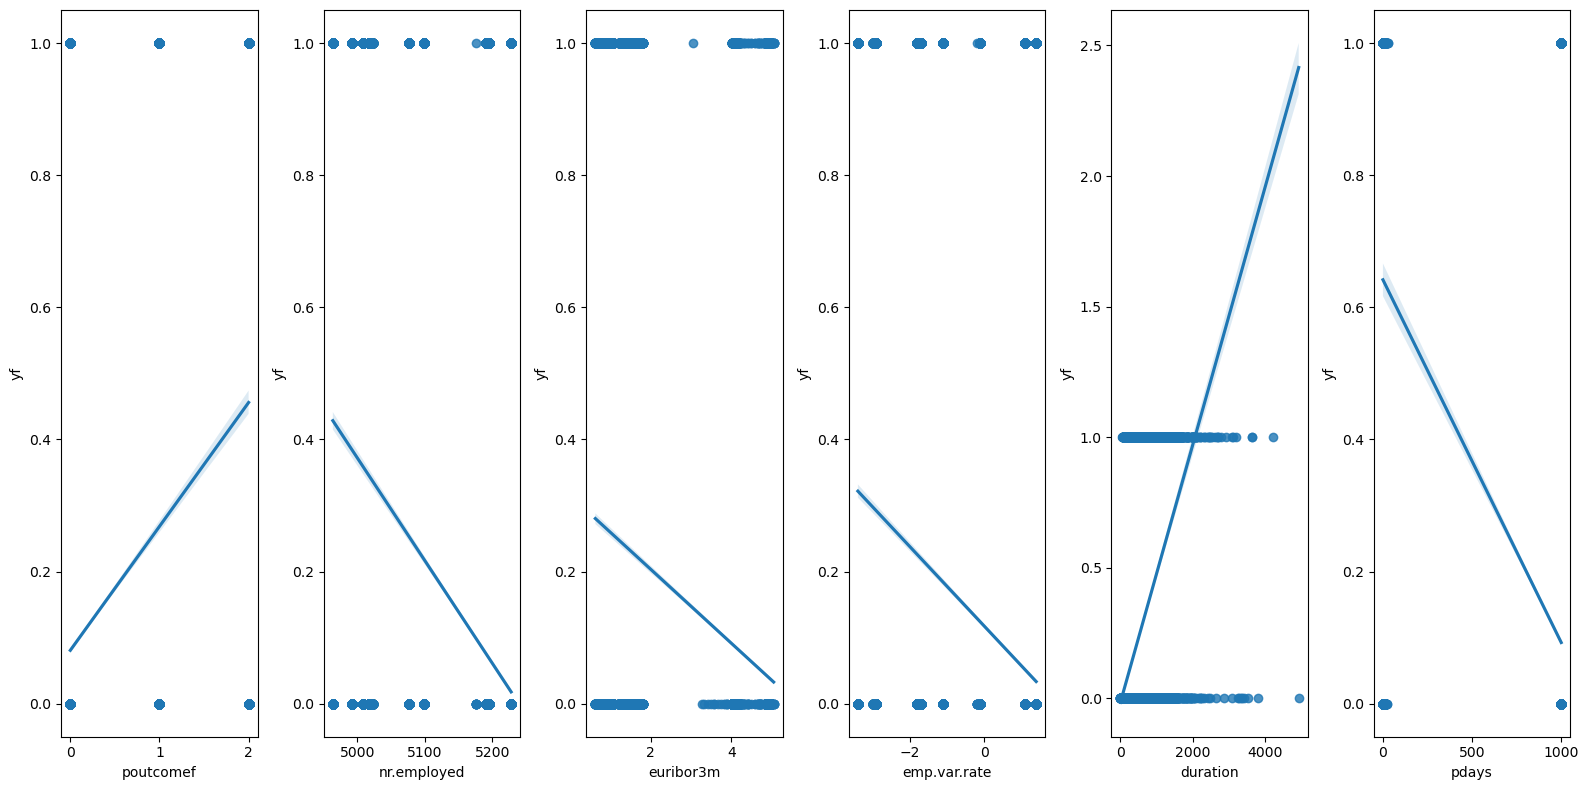

In [18]:
# Regplot the strong relationship Features (estos son cuadros de regresión lineal)

fig, axis = plt.subplots(figsize = (16, 8), ncols = 6)

# Plot the Data (WE USE REGPLOT FOR THIS METODH IS GOOD FOR LIEAL REGRESION)

sns.regplot(ax=axis[0], data=df, x='poutcomef', y='yf')
sns.regplot(ax=axis[1], data=df, x='nr.employed', y='yf')
sns.regplot(ax=axis[2], data=df, x='euribor3m', y='yf')
sns.regplot(ax=axis[3], data=df, x='emp.var.rate', y='yf')
sns.regplot(ax=axis[4], data=df, x='duration', y='yf')
sns.regplot(ax=axis[5], data=df, x='pdays', y='yf')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

##### Conclusion:

* We can see the linear regression the y with these variables.


# 7. FEATURE ENGINEERING

## 7.1 OUTLIER ANALISYS

In [19]:
# Describe of Features

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,maritalf,educationf,defaultf,housingf,loanf,contactf,monthf,day_of_weekf,poutcomef,yf
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,0.169904,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,0.455754,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


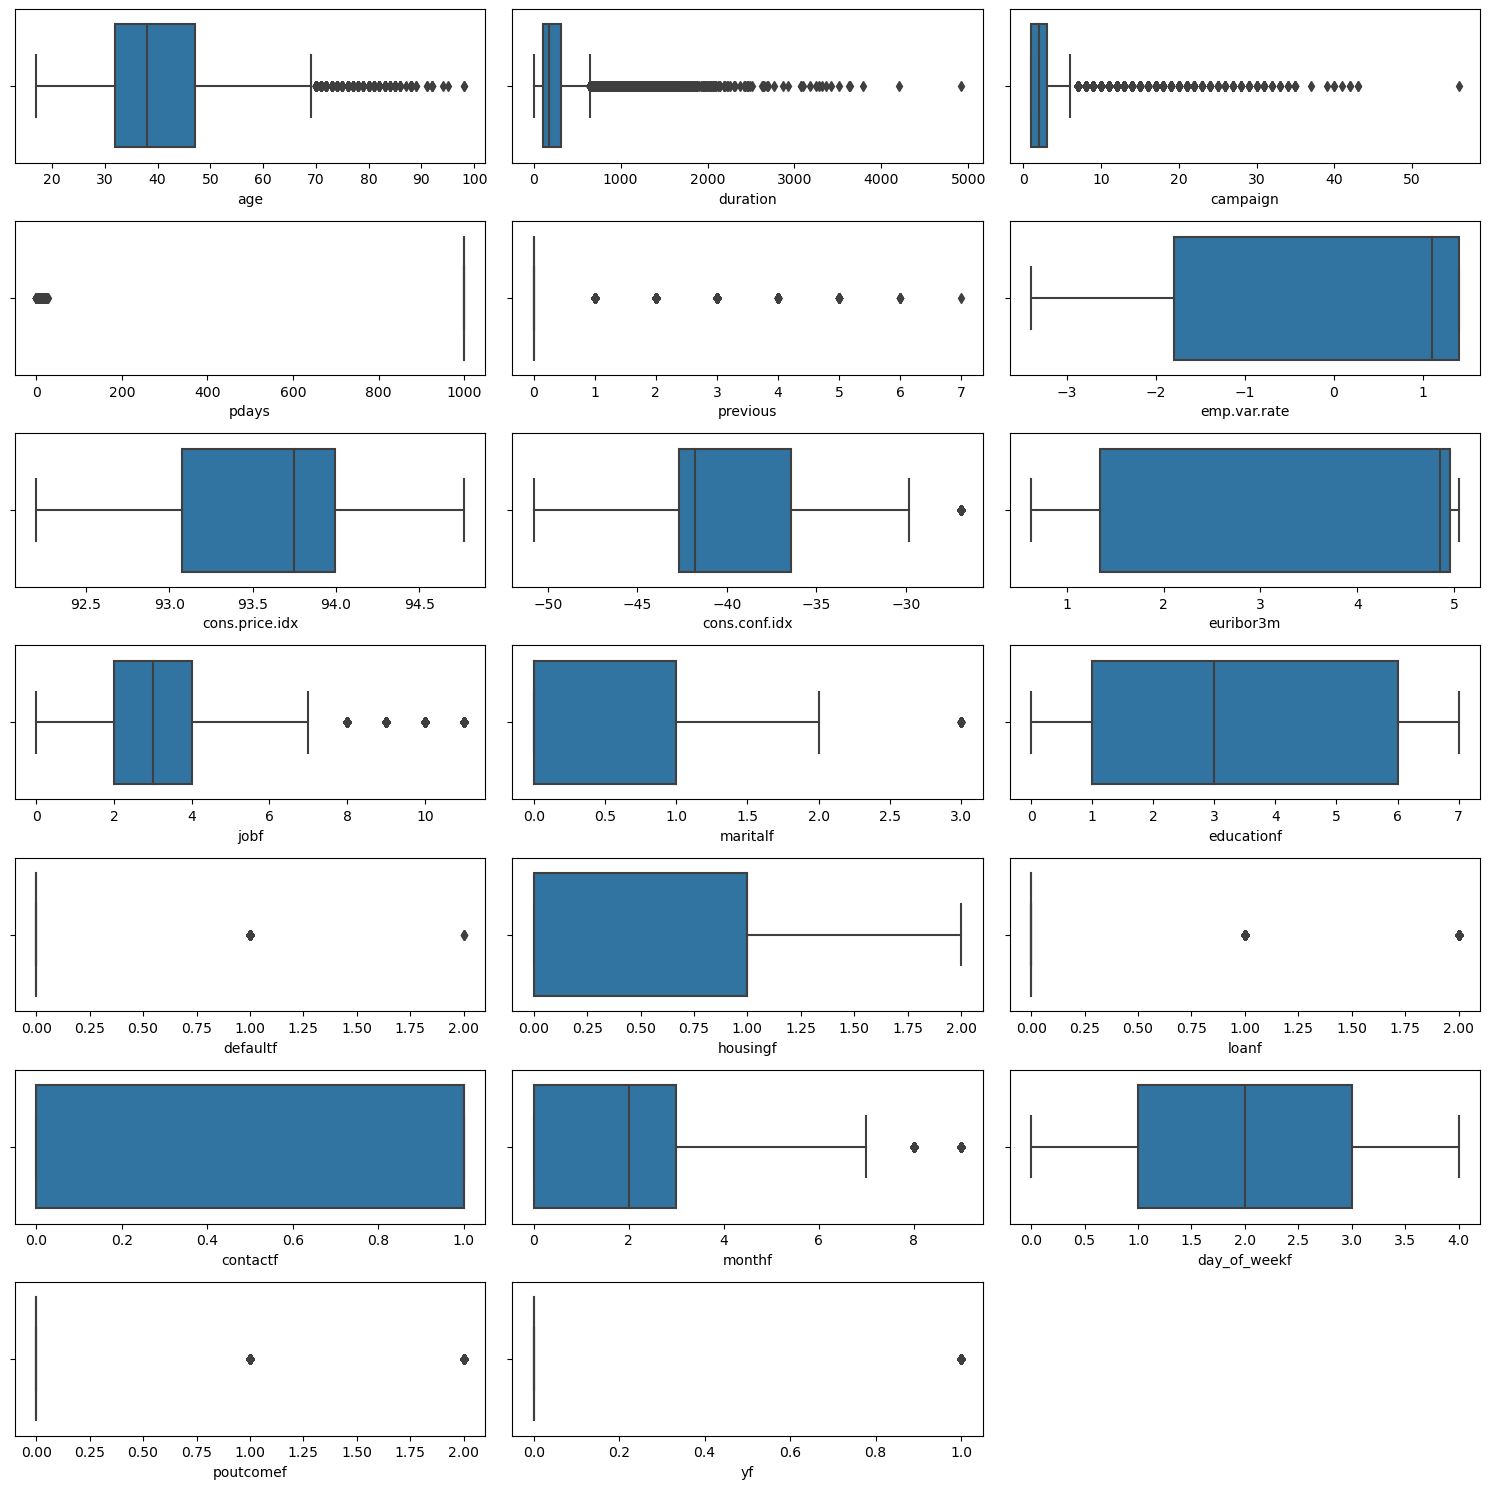

In [20]:
# Boxplots to Observe Outliers 

# Draw canvas
fig, axis = plt.subplots(7, 3, figsize=(15,15))

sns.boxplot(ax=axis[0,0], data=df, x='age')
sns.boxplot(ax=axis[0,1], data=df, x='duration')
sns.boxplot(ax=axis[0,2], data=df, x='campaign')
sns.boxplot(ax=axis[1,0], data=df, x='pdays')
sns.boxplot(ax=axis[1,1], data=df, x='previous')
sns.boxplot(ax=axis[1,2], data=df, x='emp.var.rate')
sns.boxplot(ax=axis[2,0], data=df, x='cons.price.idx')
sns.boxplot(ax=axis[2,1], data=df, x='cons.conf.idx')
sns.boxplot(ax=axis[2,2], data=df, x='euribor3m')
sns.boxplot(ax=axis[3,0], data=df, x='jobf')
sns.boxplot(ax=axis[3,1], data=df, x='maritalf')
sns.boxplot(ax=axis[3,2], data=df, x='educationf')
sns.boxplot(ax=axis[4,0], data=df, x='defaultf')
sns.boxplot(ax=axis[4,1], data=df, x='housingf')
sns.boxplot(ax=axis[4,2], data=df, x='loanf')
sns.boxplot(ax=axis[5,0], data=df, x='contactf')
sns.boxplot(ax=axis[5,1], data=df, x='monthf')
sns.boxplot(ax=axis[5,2], data=df, x='day_of_weekf')
sns.boxplot(ax=axis[6,0], data=df, x='poutcomef')
sns.boxplot(ax=axis[6,1], data=df, x='yf')
fig.delaxes(axis[6,2])

# Adjust Layout
plt.tight_layout()

# Plot

### NINTH CHECK POINT / WRITE CONCLUSIONS

* DELETE OUTLIERS
* age: Yes
* duration: Yes
* campaign: Yes
* pdays: 1000
* previous: No 
* cons.conf.idx: No
* jobf: Yes
* maritalf: nO
* default: 0
* loanf: 0
* month: No
* putcomef:  0
* yf: 0

## 7.2 OUTLIER ANALISYS: SEE IQR FOR DELETE OUTLIERS

### We use this metodh for all variables that we think that have outliers

In [21]:
# Age Analysis

age_stats = df['age'].describe()
print(age_stats)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [22]:
# Age IQR

age_iqr = age_stats['75%'] - age_stats['25%']
upper_limit = age_stats['75%'] + 1.5 * age_iqr
lower_limit = age_stats['25%'] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


In [23]:
# Duration Analysis

duration_stats = df['duration'].describe()
print(duration_stats)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [24]:
import pandas as pd

def calcular_estadisticas(df, columnas_numericas):
    # Filtrar las columnas numéricas
    cat_numericas = df[columnas_numericas]

    # Calcular el percentil 75 (Q3) y percentil 25 (Q1)
    q3 = cat_numericas.quantile(0.75)
    q1 = cat_numericas.quantile(0.25)

    # Calcular el IQR
    iqr = q3 - q1

    # Calcular el mínimo y máximo
    minimo = cat_numericas.min()
    maximo = cat_numericas.max()

    # Calcular el upper limit y lower limit para identificar valores atípicos
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Crear un DataFrame con los resultados
    resultados = pd.DataFrame({ 'Lower Limit': lower_limit,'Upper Limit': upper_limit,'IQR': iqr,
                                'Mínimo': minimo, 'Q1': q1, 'Mediana': cat_numericas.median(),
                               'Q3': q3, 'Máximo': maximo,})

    return resultados

# Ejemplo de uso
# Añadir las variables numéricas al DataFrame
# Reemplaza 'var1', 'var2', 'var3', etc. con los nombres de tus variables numéricas
df['age']
df['duration'] 
df['campaign'] 

# Calcular las estadísticas de las variables numéricas
columnas_numericas = ['age', 'duration', 'campaign']
estadisticas_resultado = calcular_estadisticas(df, columnas_numericas)

print("Estadísticas de las variables numéricas:")
print(estadisticas_resultado)

Estadísticas de las variables numéricas:
          Lower Limit  Upper Limit    IQR  Mínimo     Q1  Mediana     Q3  \
age               9.5         69.5   15.0      17   32.0     38.0   47.0   
duration       -223.5        644.5  217.0       0  102.0    180.0  319.0   
campaign         -2.0          6.0    2.0       1    1.0      2.0    3.0   

          Máximo  
age           98  
duration    4918  
campaign      56  


In [25]:
# Trimm the Outliers 
df = df[df["age"] <= 65]
df = df[df["campaign"] <= 15]

#We want selec range. if is out OF range, this is delete.

write opinion

## 7.3 NULL ACTIONS

In [26]:
# Count the Nulls

df.isnull().sum().sort_values(ascending=False)

age               0
job               0
poutcomef         0
day_of_weekf      0
monthf            0
contactf          0
loanf             0
housingf          0
defaultf          0
educationf        0
maritalf          0
jobf              0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
yf                0
dtype: int64

### TENTH CHECK POINT / WRITE CONCLUSIONS

* No null

# 8 FEATURE SCALLING

## 8.1 MIN MAX SCALER FEATURES / NORMALIZE

In [27]:
from sklearn.preprocessing import MinMaxScaler

#We push all variables numerics and categoric
num_variables = ['yf','age', 'duration', 'campaign', 'pdays','previous','emp.var.rate',
'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','jobf', 'maritalf', 'educationf',
'defaultf','housingf', 'loanf', 'contactf', 'monthf','day_of_weekf','poutcomef']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal.head()

,yf,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,jobf,maritalf,educationf,defaultf,housingf,loanf,contactf,monthf,day_of_weekf,poutcomef
0,0.0,0.812500,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.833333,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.416667,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.479167,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.812500,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0


## 8.2 FEATURE SELECTION

In [28]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_scal.drop('yf', axis = 1)
y = total_data_scal['yf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KBest Selection for the best Features
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcomef
0,0.000000,0.104167,0.143732,0.425709,0.0
1,0.000000,1.000000,0.981183,1.000000,0.0
2,0.142857,0.333333,0.174790,0.512287,0.5
3,0.000000,0.333333,0.139651,0.512287,0.0
4,0.142857,0.333333,0.192473,0.512287,0.5


In [29]:
X_train_sel['yf'] = list(y_train)
X_test_sel['yf'] = list(y_test)
X_train_sel.to_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/16 NUEVO/TRAIN.csv', index=False)
X_test_sel.to_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/16 NUEVO/TEST.csv', index=False)

# MACHINE LEARNING. 

### SELEC THE BEST METODH

* We selec logistic Regression, because we want have take a decision, and this decision is dual: Contract or not contract

# 9 LOGISTIC REGRESSION

## 9.1 CALL TRAIN / TEST 

In [30]:
# We need import Data
train_data = pd.read_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/16 NUEVO/TRAIN.csv')
test_data = pd.read_csv('G:/Mi unidad/1 Archivos py/4 GEEK/2 PROYECTOS/16 NUEVO/TEST.csv')

In [31]:
train_data.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcomef,yf
0,0.000000,0.104167,0.143732,0.425709,0.0,0.0
1,0.000000,1.000000,0.981183,1.000000,0.0,0.0
2,0.142857,0.333333,0.174790,0.512287,0.5,0.0
3,0.000000,0.333333,0.139651,0.512287,0.0,0.0
4,0.142857,0.333333,0.192473,0.512287,0.5,0.0


In [32]:
test_data.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcomef,yf
0,0.000000,1.000000,0.981410,1.000000,0.0,0.0
1,0.142857,0.333333,0.188619,0.512287,0.5,1.0
2,0.000000,1.000000,0.981864,1.000000,0.0,0.0
3,0.000000,0.937500,0.957153,0.859735,0.0,0.0
4,0.000000,1.000000,0.958966,1.000000,0.0,0.0


## 9.2 PREWORK: PREPARE TRAIN AND TEST FOR TRAIN (FIT)

In [33]:
#Preparación de los datos de entrenamiento
#-> Aqui

X_train = train_data.drop(['yf'], axis = 1)
y_train = train_data['yf']
X_test = test_data.drop(['yf'], axis = 1)
y_test = test_data['yf']

## 9.3 TRAINING MODEL LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

#-> Creamos una instancia del modelo de Regresión Logística. 
    #->   En este paso, también podemos especificar parámetros adicionales para personalizar el modelo, como el tipo de penalización (L1 o L2), el valor de C (parámetro de regularización) y otros hiperparámetros.
model = LogisticRegression()
#-> Entrenamos el modelo utilizando el método FIT()
    #-> Este método toma dos argumentos: X_train, que es una matriz que contiene las características (variables independientes) de entrenamiento, 
    #_> y y_train, que es una matriz que contiene las etiquetas (variable dependiente o target) correspondientes a las muestras de entrenamiento
model.fit(X_train, y_train)
#-> El modelo ajustará sus parámetros internos para aprender a hacer predicciones en función de los datos de entrenamiento.

#-> estas líneas de código crean un objeto de Regresión Logística, lo entrenan utilizando los datos de entrenamiento (X_train y y_train),
    #-> y el modelo resultante estará listo para hacer predicciones sobre nuevos datos.

LogisticRegression()

## 9.4 MODEL PREDICTION

* Tenemos el modelo entrenado con train, ahora vamos a ver que predicciones nos da usando test X

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

## 9.5 ACCURACY_SCORE

* Hemos entrenado el modelo (X_train)
* Hemos hecho las predicciones (X_test)
* Ahora vamos a ver su efectividad

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8973147687717553

### Conclusión:

* This model is good: 089
* Now we can improve the model, so we must optimize the hyperparameter.

## 9.6 MATRIX CONFUSION:

* La matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación en problemas binarios o multiclase. 
* La tabla muestra el número de predicciones que el modelo ha realizado correctamente y las que ha realizado incorrectamente en función de las etiquetas reales y las etiquetas predichas
* El resultado es un mapa de calor que visualiza la matriz de confusión del modelo de Regresión Logística. 
* En el mapa de calor, cada fila representa la clase real y cada columna representa la clase predicha. 
* Los valores en las celdas representan el número de muestras clasificadas correctamente en la diagonal principal y las muestras clasificadas incorrectamente en las celdas fuera de la diagonal principal. 
* Esta representación visual permite una fácil interpretación y análisis del rendimiento del modelo en cada clase.

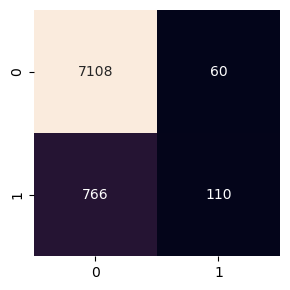

In [37]:
from sklearn.metrics import confusion_matrix

bankmkt_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bankmkt_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

## ACLARACION DE DATOS PARA ESTUDIO POSTERIOR

* En tu caso, la tabla de confusión muestra los siguientes valores:
1. Verdaderos negativos (True Negative, TN): 7108
    * Son las muestras que fueron clasificadas correctamente como pertenecientes a la clase negativa (clase 0) por el modelo.

2. Falsos positivos (False Positive, FP): 60
    * Son las muestras que fueron clasificadas incorrectamente como pertenecientes a la clase positiva (clase 1) por el modelo, cuando en realidad son de la clase negativa.

3. Falsos negativos (False Negative, FN): 766
    * Son las muestras que fueron clasificadas incorrectamente como pertenecientes a la clase negativa (clase 0) por el modelo, cuando en realidad son de la clase positiva.

4. Verdaderos positivos (True Positive, TP): 110
    * Son las muestras que fueron clasificadas correctamente como pertenecientes a la clase positiva (clase 1) por el modelo.



## 10 HYPERPARAMETER OPTIMITATION

* Actually: 0.897

### 10.1 GRID SEARCH OPTIMIZATION

In [38]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [39]:
# Launch Results

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Us

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-pack

##### Conclusion:
* No hyperparameters: 0.8973147687717553
* With the best hyperparameters {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

### 10.2 NEW PARAMETERS

* Probamos añadiendo los nuevos parametros

In [40]:
model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9002983590253605

##### Conclusion:
With new parameter: 0.9002983590253605

We have won: 0.00298359025

# 11 RANDOM OPTIMIZATION / RANDOMIZED

* Random system that searches several hyperparameters and chooses from a selection the one it considers the most correct. 
* It is faster but less effective.

In [41]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [42]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Us

Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 0.08858667904100823}


c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Password\Desktop\Instalacion\Anacondas\lib\sit

In [43]:
model_grid = LogisticRegression(penalty = "l2", C = 0.08858667904100823, solver = "sag")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9002983590253605

##### Conclusion:
* No hyperparameters: 0.8973147687717553
* The best parameter: 0.9002983590253605
* Random hyperparameters: 0.9002983590253605


##### The best parameter and Random hyperparameters are SIMILAR.
